# Introduction to Machine Learning — 2024/2025 Supervised Learning

In the following exercises the objective is to program algorithms that, given examples and
an expected output, learn to mimic the behavior present in the data.

In [1]:
# load important packages

import numpy as np
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
from tabulate import tabulate
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import math

### Exercise 1



1. Choose one of the binary operations (AND or OR) and build two vectors: one with all the different input combinations of two bit patterns (4 vectors): where 0 stands for FALSE and 1 for TRUE ; and another vector containing the target / desired response, d, for each of the corresponding input vectors, as result of the chosen operation, namely: OR {0, 1, 1, 1} or AND {0, 0, 0, 1}.

In [2]:
vector = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([0,1,1,1])

2. Initialize w0, w1, and w2 to small random values and, for each input pattern, calculate the corresponding output, storing it in vector o.

In [3]:
w0 = np.random.rand()
w1 = np.random.rand()
w2 = np.random.rand()

s = w0 + w1 * vector[:, 0] + w2 * vector[:, 1]
print(s)
o = np.where(s < 0.5, 0, 1)

[0.93423251 1.20266851 1.46693826 1.73537425]


3. Calculate the difference / error (e = d − o) between the desired response (d) and the output (o), for each output.

In [4]:
e = d - o
e

array([-1,  0,  0,  0])

4. For each error in e, add to the update term for w0 (∆w0), w1 (∆w1), and w2 (∆w2) according to:


    ∆w0 = ∆w0 + α · e

    ∆w1 =∆w1 +α·x1 · e
    
    ∆w2 =∆w2 +α·x2 · e


In [5]:
alpha = 0.0001
d_w0 = 0
d_w1 = 0
d_w2 = 0
for error in range(0, len(e)):
    d_w0 += alpha*e[error]
    d_w1 += alpha*e[error]*vector[error][0]
    d_w2 += alpha*e[error]*vector[error][1]

5. Prepare your code to cycle through the whole dataset (in this case, 4 examples) several times doing the above procedure (to train for several "epochs").
6. After all examples are presented (at the end of each epoch), update w0, w1 and w2. so that in the next iteration the error will decrease. Repeat for 20 epochs.

In [6]:
# Train for several epochs
vector = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([0,1,1,1])

w0 = np.random.rand()*2 -1
w1 = np.random.rand()*2 -1
w2 = np.random.rand()*2 -1
alpha = 0.01

epochs = 20
errors = np.zeros((epochs, 4))
weights = np.zeros((epochs, 3))
e_labels = ['Error 1', 'Error 2', 'Error 3', 'Error 4']
w_labels = ['w0', 'w1', 'w2']

for i in range(0, epochs):
    d_w0 = 0
    d_w1 = 0
    d_w2 = 0
    s = w0 + w1 * vector[:, 0] + w2 * vector[:, 1]
    print(s)
    o = np.where(s < 0.5, 0, 1)
    e = d - o
    for error in range(0, len(e)):
        d_w0 += alpha*e[error]
        d_w1 += alpha*e[error]*vector[error][0]
        d_w2 += alpha*e[error]*vector[error][1]
    if d_w0 == 0 and d_w1 == 0 and d_w2 == 0:
        print('no changes')
    w0 += d_w0
    w1 += d_w1
    w2 += d_w2
    errors[i] = e
    weights[i][0] = w0
    weights[i][1] = w1
    weights[i][2] = w2 




[-0.75057296 -0.02628101 -0.19168619  0.53260576]
[-0.73057296  0.00371899 -0.16168619  0.57260576]
[-0.71057296  0.03371899 -0.13168619  0.61260576]
[-0.69057296  0.06371899 -0.10168619  0.65260576]
[-0.67057296  0.09371899 -0.07168619  0.69260576]
[-0.65057296  0.12371899 -0.04168619  0.73260576]
[-0.63057296  0.15371899 -0.01168619  0.77260576]
[-0.61057296  0.18371899  0.01831381  0.81260576]
[-0.59057296  0.21371899  0.04831381  0.85260576]
[-0.57057296  0.24371899  0.07831381  0.89260576]
[-0.55057296  0.27371899  0.10831381  0.93260576]
[-0.53057296  0.30371899  0.13831381  0.97260576]
[-0.51057296  0.33371899  0.16831381  1.01260576]
[-0.49057296  0.36371899  0.19831381  1.05260576]
[-0.47057296  0.39371899  0.22831381  1.09260576]
[-0.45057296  0.42371899  0.25831381  1.13260576]
[-0.43057296  0.45371899  0.28831381  1.17260576]
[-0.41057296  0.48371899  0.31831381  1.21260576]
[-0.39057296  0.51371899  0.34831381  1.25260576]
[-0.38057296  0.52371899  0.36831381  1.27260576]


(a) Plot the value of the error at the end of each epoch, how does it behave?

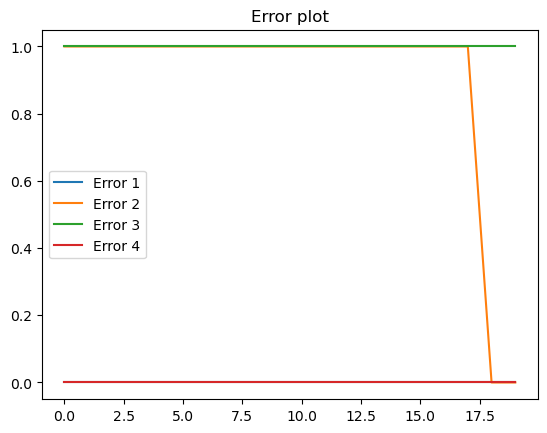

In [7]:
for i in range(errors.shape[1]):
    plt.plot(errors[:, i], label=e_labels[i])

plt.title('Error plot')
plt.legend()
plt.show()

###  How do the errors behave over the epochs?
In the beginning, each error of each output can either be 1/-1 or already 0. (Predicting false or correct). By learning from the feedback the weights are improved so that in the end all errors will converge to 0. (Meaning that the output is correct)

(b) Plot the value of each weight at the end of each training epoch. Are the values converging? if so, do they converge to similar values in different runs (with different random intializations)?

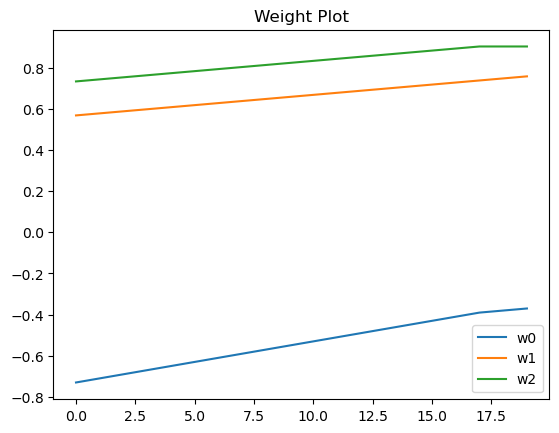

In [8]:
for i in range(weights.shape[1]):  # Loop over columns (error metrics)
    plt.plot(weights[:, i], label=w_labels[i])

plt.title('Weight Plot')
plt.legend()  # Show the legend with the labels
plt.show()

### Are the values converging? if so, do they converge to similar values in different runs (with different random intializations)?

They do converge, and eventhough the exact values are different, for the AND perceptron all weights converge to values between 0 and 0.5.
For the OR perceptron they converge to values between -1 and 1.

(d) How many epochs (iterations through the whole set) did it take to get all examples right? (i.e. ∀i : di = oi). Repeat the experiment 30 times with different random values for the initial weights and present the average and standard deviation of the number of epochs it took to converge.

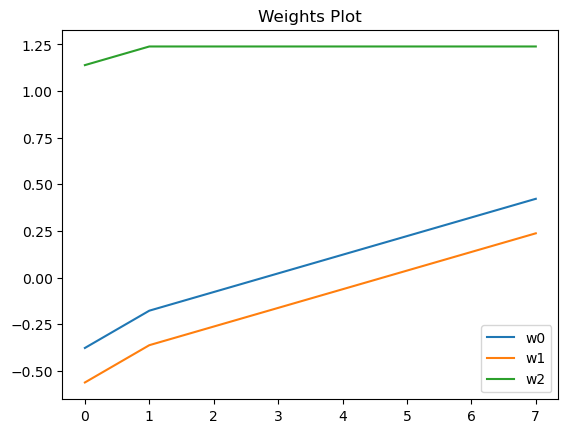

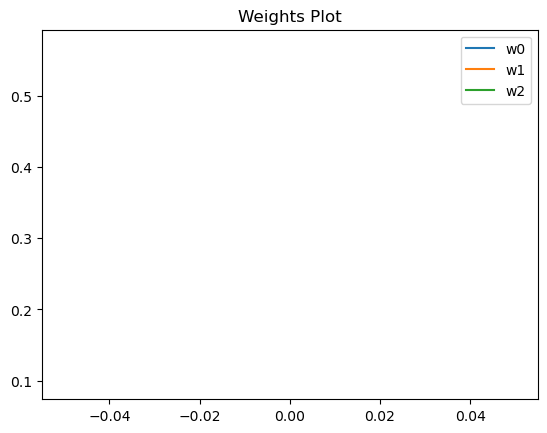

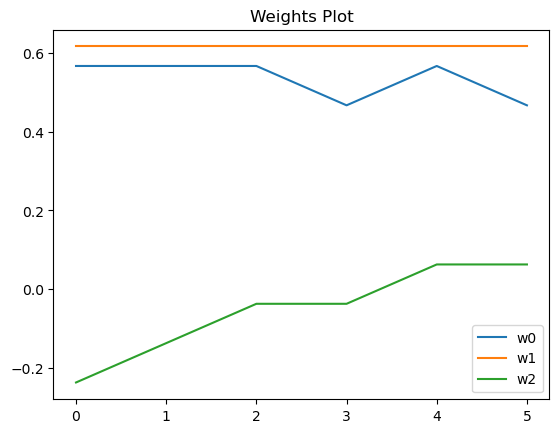

mean: 6.833333333333333
standard deviation: 3.7690258098818523


In [9]:
# Repeat experiment 30 times and save the results to a file
# 6(d)

def repeat(alpha, plot=True):
    list = []

    for j in range(0, 30):
        vector = np.array([[0,0],[0,1],[1,0],[1,1]])
        d = np.array([0,1,1,1])
        w0 = np.random.rand()*2 -1
        w1 = np.random.rand()*2 -1
        w2 = np.random.rand()*2 -1
        #alpha = 0.01

        epochs = 20000
        errors = np.zeros((epochs, 4))
        weights = np.zeros((epochs, 3))

        for i in range(0, epochs):
            d_w0 = 0
            d_w1 = 0
            d_w2 = 0
            s = w0 + w1 * vector[:, 0] + w2 * vector[:, 1]
            o = np.where(s < 0.5, 0, 1)
            e = d - o
            for error in range(0, len(e)):
                d_w0 += alpha*e[error]
                d_w1 += alpha*e[error]*vector[error][0]
                d_w2 += alpha*e[error]*vector[error][1]
            if d_w0 == 0 and d_w1 == 0 and d_w2 == 0:
                list.append(i)
                break
            w0 += d_w0
            w1 += d_w1
            w2 += d_w2
            errors[i] = e
            weights[i][0] = w0
            weights[i][1] = w1
            weights[i][2] = w2 
        
        if plot==True:
            if j%10 == 0:
                for i in range(weights.shape[1]):  # Loop over columns (error metrics)
                    # Find the first occurrence of zero in the column
                    zero_index = np.argmax(weights[:, i] == 0)  # Returns the index of the first zero
                    if zero_index == 0 and weights[0, i] != 0:
                        # If there are no zeros, plot the entire column
                        plt.plot(weights[:, i], label=w_labels[i])
                    else:
                        # Plot only up to the first zero
                        plt.plot(weights[:zero_index, i], label=w_labels[i])

                plt.legend()
                plt.title("Weights Plot")
                plt.show()


        
    return list

list = repeat(0.1)
list
print(f'mean: {np.mean(list)}')
print(f'standard deviation: {np.std(list)}')

(c) What is the effect of increasing/decreasing the α parameter? Can you tell (approximately) what is the "best" value for α?

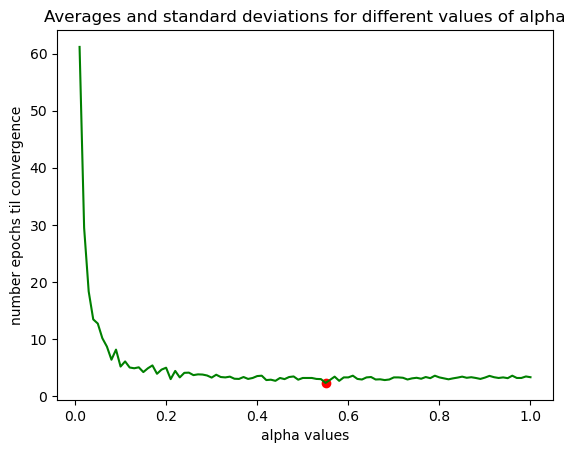

Best alpha: 0.55
Number of epochs for best alpha: 2.3


In [10]:
averages = []
st_deviations = []
alphas = []

for i in range(1, 101, 1):
    i = i / 100
    alphas.append(i)
    averages.append(np.mean(repeat(i, plot=False)))
    st_deviations.append(np.std(repeat(i, plot=False)))

#print(averages)
#print(st_deviations)
#print(alphas)

minX = (np.argmin(averages)+1)/100
minY = np.min(averages)

plt.plot(alphas, averages, c="green")
#plt.plot(alphas, st_deviations)
plt.scatter(minX, minY,c='r', label='minimum')
plt.title('Averages and standard deviations for different values of alpha')
plt.xlabel("alpha values")
plt.ylabel("number epochs til convergence")
plt.show()

print(f"Best alpha: {minX}")
print(f"Number of epochs for best alpha: {minY}")

### (c) What is the effect of increasing/decreasing the α parameter? Can you tell (approximately) what is the "best" value for α?

The higher alpga, the stronger are the weights changes whenever an output is wrong. When alpha is too small, improving the weights in order to make good predictions is too slow and needs many epochs. When alpha is too big, the changes in weights will be too big and the correct a´weights are "overshot".

A good value for alpha: always some value between 0.01 - 0.05


7. Generate 2D points using a multivariate Gaussian distribution.

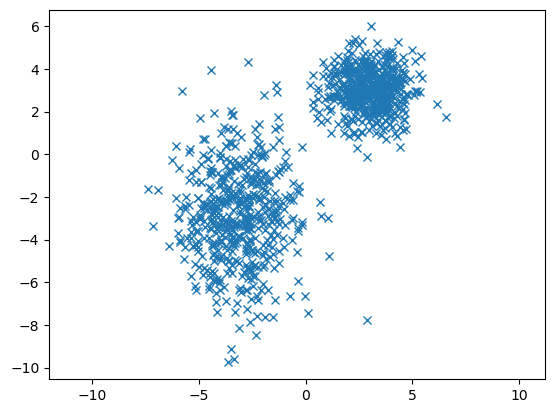

In [11]:
mean= [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

new_col_a = np.zeros((1, a.shape[1]))
a = np.append(a, new_col_a, axis = 0)

mean= [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 500).T

new_col_b = np.ones((1, b.shape[1]))
b = np.append(b, new_col_b, axis = 0)

c = np.concatenate((a, b) , axis = 1) 
c=c.T
np.random.shuffle(c)
c=c.T

x = c[0] 
y=c[1]
labels=c[2]
plt.plot(x, y, "x") 
plt.axis("equal") 
plt .show()

# save and load data
np.savetxt("testData.csv", c, delimiter=",")
data = genfromtxt('testData.csv', delimiter=',')

8. Use the dataset generated in the previous task as the training set for the same perceptron and train it to partition the two datasets (adjust number of epochs if necessary). Notice that the same program learned two different tasks depending on the dataset used.

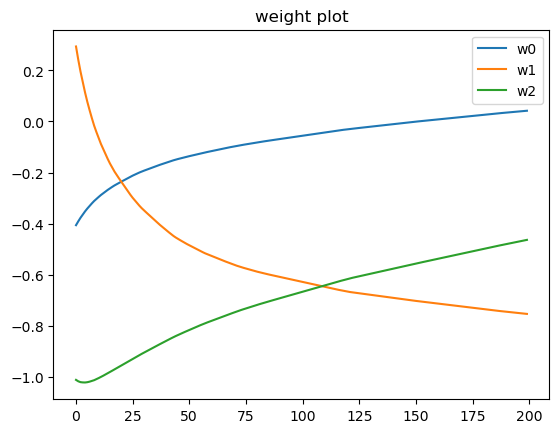

In [12]:
# Train for several epochs
vector = c[0:2].T
d = c[2] # desired output

w0 = np.random.rand()*2 -1
w1 = np.random.rand()*2 -1
w2 = np.random.rand()*2 -1
alpha = 0.0001

epochs = 200
errors = np.zeros((epochs, 1000))
weights = np.zeros((epochs, 3))
os = np.zeros((epochs, 1000))
w_labels = ['w0', 'w1', 'w2']

for i in range(0, epochs):
    d_w0 = 0
    d_w1 = 0
    d_w2 = 0
    s = w0 + w1 * vector[:, 0] + w2 * vector[:, 1]
    #print(s)
    o = np.where(s < 0.5, 0, 1)
    #print(o)
    e = d - o
    for error in range(0, len(e)):
        d_w0 += alpha*e[error]
        d_w1 += alpha*e[error]*vector[error][0]
        d_w2 += alpha*e[error]*vector[error][1]
    if d_w0 == 0 and d_w1 == 0 and d_w2 == 0:
        print('no changes')
        print(f'w0: {w0}')
        print(f'w1: {w1}')
        print(f'w2: {w2}')
    w0 += d_w0
    w1 += d_w1
    w2 += d_w2
    errors[i] = e
    os[i] = o
    weights[i][0] = w0
    weights[i][1] = w1
    weights[i][2] = w2 

for i in range(weights.shape[1]):  # Loop over columns (error metrics)
    plt.plot(weights[:, i], label=w_labels[i])

plt.title('weight plot')
plt.legend()  # Show the legend with the labels
plt.show()



In [13]:
vector

array([[ 1.27771314,  3.23244491],
       [ 2.23389064,  3.4097263 ],
       [ 3.23048599,  2.57478273],
       ...,
       [-4.43530061, -0.84986553],
       [ 3.29217689,  2.80134327],
       [ 3.21015169,  2.13839901]])

In [14]:
result = np.concatenate((vector, d.reshape(-1, 1), os[0].reshape(-1, 1)), axis=1)
result

array([[ 1.27771314,  3.23244491,  0.        ,  0.        ],
       [ 2.23389064,  3.4097263 ,  0.        ,  0.        ],
       [ 3.23048599,  2.57478273,  0.        ,  0.        ],
       ...,
       [-4.43530061, -0.84986553,  1.        ,  0.        ],
       [ 3.29217689,  2.80134327,  0.        ,  0.        ],
       [ 3.21015169,  2.13839901,  0.        ,  0.        ]])

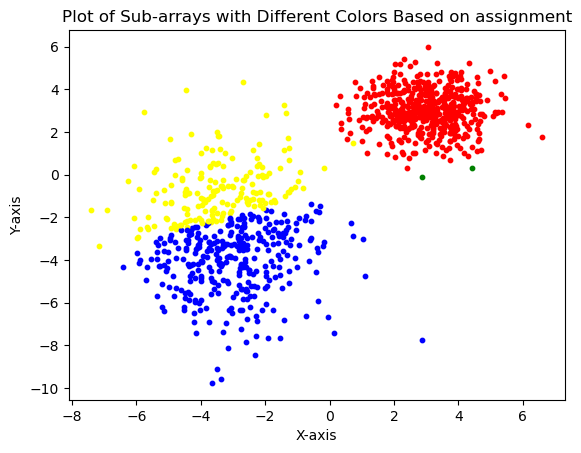

In [15]:
result = np.concatenate((vector, d.reshape(-1, 1), os[0].reshape(-1, 1)), axis=1)
result

colors = []
for subarray in result: # four different colours for plotting exercise 1.6
    if subarray[2] == 0 and subarray[3] == 0:
        colors.append('red')  # Color 1: correctly assigned to cluster 0
    elif subarray[2] == 1 and subarray[3] == 1:
        colors.append('blue')  # Color 2: correctly assigned to cluster 1
    elif subarray[2] == 0 and subarray[3] == 1:
        colors.append('green')  # Color 3: incorrectly assigned to cluster 1
    elif subarray[2] == 1 and subarray[3] == 0:
        colors.append('yellow')  # Color 4: incorrectly assigned to cluster 0

for i, subarray in enumerate(result):
    plt.scatter(subarray[0], subarray[1],color=colors[i], s=10)

# Adding labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Sub-arrays with Different Colors Based on assignment')
#plt.legend(loc='lower right')
plt.show()

9. Print/Plot the confusion matrix for the above test. Can you relate each of the numbers in the confusion matrix to the points of a given color on the previously generated figure?

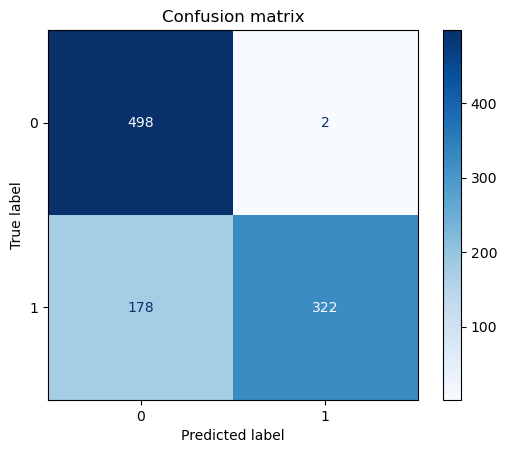

In [16]:
np.concatenate((vector, d.reshape(-1, 1), os[199].reshape(-1, 1)), axis=1).T
y_true = d
y_pred = os[0]
cm = confusion_matrix(y_true, y_pred)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

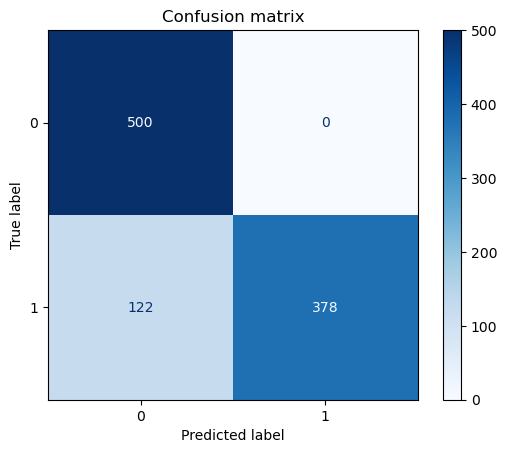

In [17]:
y_true = d
y_pred = os[4]
cm = confusion_matrix(y_true, y_pred)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

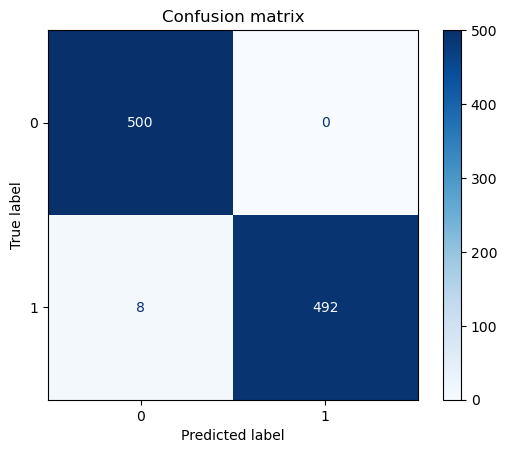

In [18]:
y_true = d
y_pred = os[199]
cm = confusion_matrix(y_true, y_pred)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

Red: top left corner, correctly assigned to cluster 0

Blue: top left corner, correctly assigned to cluster 1

Yellow: bottom left corner, incorrectly assigned to cluster 0

Green: top right corner, incorrectly assigned to cluster 1

10. Print the metrics (accuracy, precision, recall, and F1) for all the tests: metrics should be an average for 30 tests with the same parameters but different initial weights.

In [19]:
howManyEpochs = len(os)
F1Score = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"average performance after {howManyEpochs} training epochs:")
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1Score: {F1Score}")


average performance after 200 training epochs:
accuracy: 0.992
precision: 1.0
recall: 0.984
F1Score: 0.9919354838709677


### Exercise 2

Implement a k-NN classifier that is specifically suited for the dataset in https://archive.ics.uci.edu/ml/datasets/iris.
Given a dataset containing labelled examples (a training set) and a new example (extracted from the test set), the classifier should calculate the euclidean distance from the new example to all the elements of the training set, choose the k closest elements of the training set and output this example classification as the class of the majority of the k closest training set elements (the k-Nearest Neighbors).

1. Split the dataset randomly in two subsets (70% / 30%). Use the bigger subset as the training set and the smaller as the test set. Run all test examples through the classifier and calculate the number of correct predictions over the total number of examples of the test set. Compare the scores of k-NN classifiers for k = 3, 7, and 11. Repeat 30 times, with different dataset splits, for each value of k. Use a boxplot with whiskers graphic to allow easy comparison.


In [20]:
coloumnNames = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data = pd.read_csv("data/iris.data", sep = ",", names = coloumnNames)

# divide data into input features (y) and output criterion (X)
y = data.loc[:, data.columns != 'class']
X = data.loc[:,'class']

# get seperate train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# training data is needed with features and outcomes:
trainingData = y_train.join(X_train)
trainingData

# reindexing
trainingData = trainingData.reset_index()  
trainingData = trainingData.drop(labels = "index", axis = "columns")

# also reindex testdata, therefore first join X and y and then split again

testData = y_test.join(X_test)
testData

# reindexing
testData = testData.reset_index()  
testData = testData.drop(labels = "index", axis = "columns")

y_test = testData.loc[:, data.columns != 'class']
X_test = testData.loc[:,'class']


In [21]:
def getEuclideanDistance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)

    distance = np.sqrt(np.sum((point1 - point2) ** 2))

    return(distance)

In [22]:
# classifier function
def kNearestNeighbourClassifier(trainData, testData, k):
    dictIndexToDistance = {}
    kMinDistances = []
    index = 0
    for index, dataPoint in trainData.iterrows():
        distance = getEuclideanDistance(dataPoint[:4], testData)
        dictIndexToDistance[index] = distance
        index += 1
    
    for i in range(k):
        minDistance = min(dictIndexToDistance, key = dictIndexToDistance.get)
        kMinDistances.append(minDistance)
        del dictIndexToDistance[minDistance]

    classesOfPointsWithMinDistances = []
    for index in kMinDistances:
        classesOfPointsWithMinDistances.append(trainData.iloc[index]["class"])

    classesOfPointsWithMinDistances = pd.Series(classesOfPointsWithMinDistances, dtype = "category")
    predictedClass = classesOfPointsWithMinDistances.mode()[0]

    return(predictedClass)

# example 
print("prediction:")
print(kNearestNeighbourClassifier(trainingData, y_test.iloc[0], 3))


prediction:
Iris-setosa


In [23]:
# run all the test examples and classify
allK = [3, 7, 11]
allSingleAccuraciesInList = []
for k in allK:

    allAccuracies = []
    for i in range(30):

        # get random data splits and preprocess 
        y = data.loc[:, data.columns != 'class']
        X = data.loc[:,'class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        trainingData = y_train.join(X_train)
        trainingData = trainingData.reset_index()  
        trainingData = trainingData.drop(labels = "index", axis = "columns")
        testData = y_test.join(X_test)
        testData = testData.reset_index()  
        testData = testData.drop(labels = "index", axis = "columns")
        y_test = testData.loc[:, data.columns != 'class']
        X_test = testData.loc[:,'class']

        allPredictedClasses = []
        for i in range(len(y_test)):
            predictedClass = kNearestNeighbourClassifier(trainingData, y_test.iloc[i], k)
            allPredictedClasses.append(predictedClass)

        position = 0
        totalCorrectPredictions = 0
        for item in allPredictedClasses:
            if item == X_test[position]:
                totalCorrectPredictions += 1
            position += 1

        accuracy = totalCorrectPredictions/position
        allAccuracies.append(accuracy)

    allSingleAccuraciesInList.append(allAccuracies)
    averageAccuracy = sum(allAccuracies)/len(allAccuracies)
    print(f"Average accuracy for k = {k}: {round(averageAccuracy, 2)}")

Average accuracy for k = 3: 0.95
Average accuracy for k = 7: 0.97
Average accuracy for k = 11: 0.97


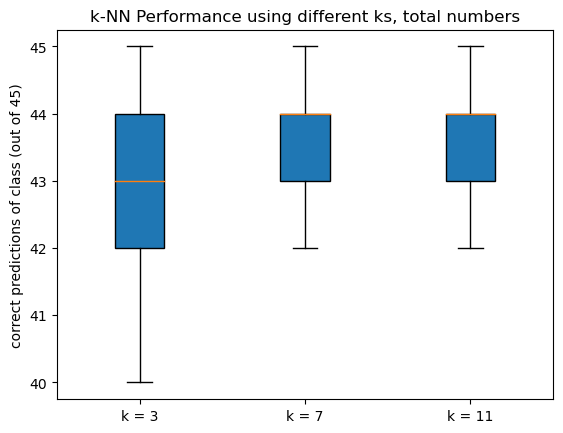

In [24]:
# visualize total numbers
tryout = []
for item in allSingleAccuraciesInList:
    outtry = []
    for i in item:
        outtry.append(i*len(y_test))
    tryout.append(outtry)

labels = ["k = 3", "k = 7", "k = 11"]

fig, ax = plt.subplots()
ax.set_ylabel("correct predictions of class (out of 45)")
ax.set_title('k-NN Performance using different ks, total numbers')
bplot = ax.boxplot(tryout, 
                   labels = labels, 
                   patch_artist=True,
                   whis=1.5)
plt.show()

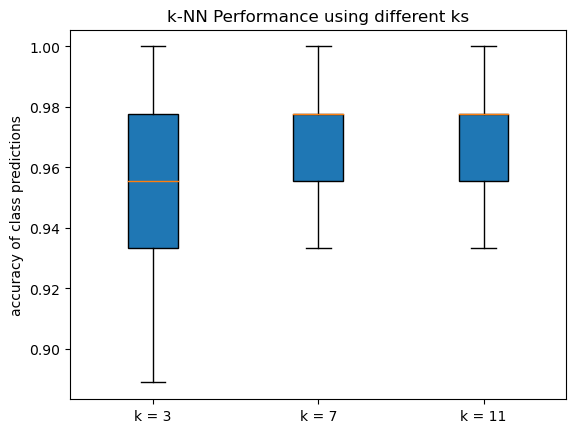

In [25]:
# visualize accuracies
labels = ["k = 3", "k = 7", "k = 11"]

fig, ax = plt.subplots()
ax.set_ylabel("accuracy of class predictions")
ax.set_title('k-NN Performance using different ks')
bplot = ax.boxplot(allSingleAccuraciesInList, 
                   labels = labels, 
                   patch_artist=True,
                   whis=1.5)
plt.show()

2. Plot the confusion matrix of one of the tests for each value of k.


Confusion matrix for k = 3:
True cluster       label Iris-virginica    label Iris-versicolor    label Iris-setosa
---------------  ----------------------  -----------------------  -------------------
Iris-virginica                       16                        0                    0
Iris-versicolor                       1                       15                    0
Iris-setosa                           0                        0                   13

 


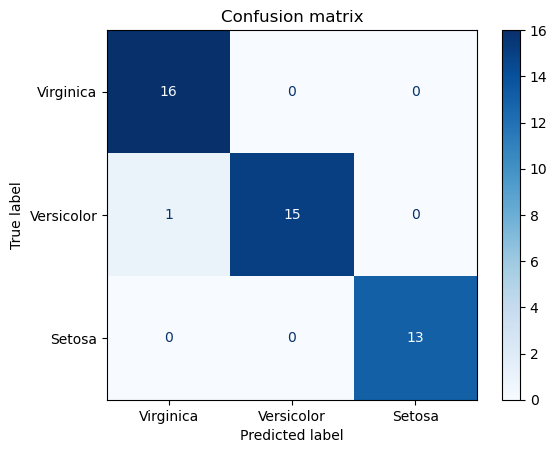

Confusion matrix for k = 7:
True cluster       label Iris-virginica    label Iris-versicolor    label Iris-setosa
---------------  ----------------------  -----------------------  -------------------
Iris-virginica                       16                        0                    0
Iris-versicolor                       1                       15                    0
Iris-setosa                           0                        0                   13

 


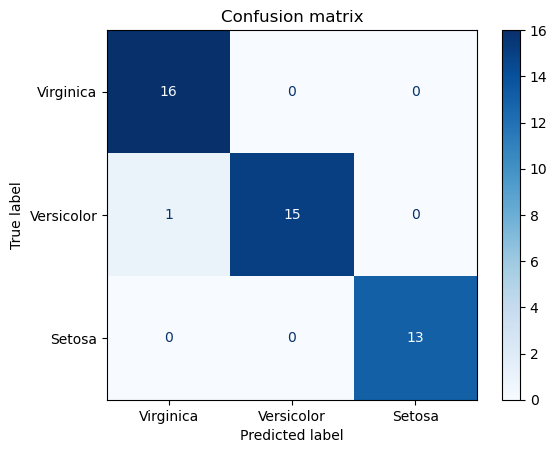

Confusion matrix for k = 11:
True cluster       label Iris-virginica    label Iris-versicolor    label Iris-setosa
---------------  ----------------------  -----------------------  -------------------
Iris-virginica                       16                        0                    0
Iris-versicolor                       1                       15                    0
Iris-setosa                           0                        0                   13

 


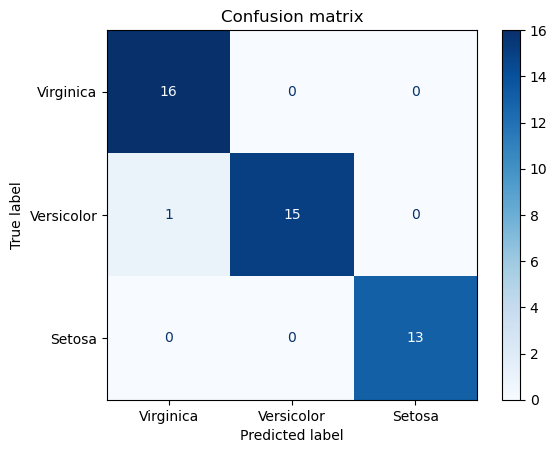

In [26]:
 # get random data splits and preprocess 
y = data.loc[:, data.columns != 'class']
X = data.loc[:,'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
trainingData = y_train.join(X_train)
trainingData = trainingData.reset_index()  
trainingData = trainingData.drop(labels = "index", axis = "columns")
testData = y_test.join(X_test)
testData = testData.reset_index()  
testData = testData.drop(labels = "index", axis = "columns")
y_test = testData.loc[:, data.columns != 'class']
X_test = testData.loc[:,'class']

# run all the test examples and classify
allK = [3, 7, 11]
for k in allK:
    allPredictedClasses = []
    for i in range(len(y_test)):
        predictedClass = kNearestNeighbourClassifier(trainingData, y_test.iloc[i], k)
        allPredictedClasses.append(predictedClass)

    position = 0
    numberHitsVirginica = 0
    numberHitsVersicolor = 0
    numberHitsSetosa = 0
    virginicaInsteadVersicolor = 0
    virginicaInsteadSetosa = 0
    versicolorInsteadSetosa = 0
    versicolorInsteadVirginica = 0
    setosaInsteadVirginica = 0
    setosaInsteadVersicolor = 0

    for item in allPredictedClasses:
        # hits
        if item == X_test[position] == "Iris-virginica":
            numberHitsVirginica += 1
        elif item == X_test[position] == "Iris-versicolor":
            numberHitsVersicolor += 1
        elif item == X_test[position] == "Iris-setosa":
            numberHitsSetosa += 1
        # false decisions
        elif item == "Iris-virginica" and X_test[position] == "Iris-versicolor":
            virginicaInsteadVersicolor += 1
        elif item == "Iris-virginica" and X_test[position] == "Iris-setosa":
            virginicaInsteadSetosa += 1

        elif item == "Iris-versicolor" and X_test[position] == "Iris-virginica":
            versicolorInsteadVirginica += 1
        elif item == "Iris-versicolor" and X_test[position] == "Iris-setosa":
            versicolorInsteadSetosa += 1

        elif item == "Iris-setosa" and X_test[position] == "Iris-virginica":
            setosaInsteadVirginica += 1
        elif item == "Iris-setosa" and X_test[position] == "Iris-versicolor":
            setosaInsteadVersicolor += 1   
        position += 1

    # confusion matrix
    confusionMatrix = [
        ["Iris-virginica", numberHitsVirginica, round(versicolorInsteadVirginica, 2) , round(setosaInsteadVirginica, 2)],
        ["Iris-versicolor", round(virginicaInsteadVersicolor, 2), round(numberHitsVersicolor, 2), round(setosaInsteadVersicolor, 2)],
        ["Iris-setosa", round(virginicaInsteadSetosa, 2), round(versicolorInsteadSetosa, 2), round(numberHitsSetosa, 2)]
    ]
    head = ["True cluster", "label Iris-virginica", "label Iris-versicolor", "label Iris-setosa"]
    tableConfusionMatrix = tabulate(confusionMatrix, headers = head)
    print(f"Confusion matrix for k = {k}:")
    print(tableConfusionMatrix)
    print("\n ")

    cm = [
        [numberHitsVirginica, versicolorInsteadVirginica, setosaInsteadVirginica],
        [virginicaInsteadVersicolor, numberHitsVersicolor, setosaInsteadVersicolor],
        [virginicaInsteadSetosa, versicolorInsteadSetosa, numberHitsSetosa]
    ]
    cm = np.array(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Virginica", "Versicolor", "Setosa"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion matrix")
    plt.show()





3. Considering the dataset presented in Fig. 3, why should k always be an odd number?

Caviate: For 2 clusters!

If we chose an even number of k, it would be possible that the k closest training examples would be evenly distributed between the 2 clusters, leaving the algorithm undecided which one to categorize as the most common.


### Exercise 3

Using the dataset from the previous exercise, implement a Naive Bayes classifier.

1. Transform by discretizing all columns’ values into categories with three possible values (low / medium / high). Use a sensible partition for each column. As in the previous exercise, split the dataset randomly in two subsets (70% / 30%). Repeat the process of the previous exercise to obtain evaluation metrics and an example of a confusion matrix (this time, there is no parameter to vary, so only one cycle of 30 repetitions with different dataset partitions).

In [27]:
data.describe(percentiles=[.33,.66])


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
33%,5.400000,2.900000,2.087000,0.668000
50%,5.800000,3.000000,4.350000,1.300000
66%,6.234000,3.200000,4.834000,1.600000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# discretizise columns
data.describe(percentiles=[.33,.66])

data["sepal length (cat)"] = pd.cut(data["sepal length"],
       bins=[0, 5.4, 6.24, 7.9], 
       labels=["low", "medium", "high"])

data["sepal width (cat)"] = pd.cut(data["sepal width"],
       bins=[0, 2.9, 3.2, 4.4], 
       labels=["low", "medium", "high"])

data["petal length (cat)"] = pd.cut(data["petal length"],
       bins=[0, 2.087, 4.83, 6.9], 
       labels=["low", "medium", "high"])

data["petal width (cat)"] = pd.cut(data["petal width"],
       bins=[0, 0.668, 1.6, 2.5], 
       labels=["low", "medium", "high"])

columnsToSubset = ['sepal length (cat)', 'sepal width (cat)',
       'petal length (cat)', 'petal width (cat)', 'class']
dataCategorical = data[columnsToSubset]

In [29]:
 # get random data splits and preprocess 
y = dataCategorical.loc[:, dataCategorical.columns != 'class']
X = dataCategorical.loc[:,'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
trainingData = y_train.join(X_train)
trainingData = trainingData.reset_index()  
trainingData = trainingData.drop(labels = "index", axis = "columns")
testData = y_test.join(X_test)
testData = testData.reset_index()  
testData = testData.drop(labels = "index", axis = "columns")
y_test = testData.loc[:, dataCategorical.columns != 'class']
X_test = testData.loc[:,'class']

In [30]:
# loop over all test examples

# build bayesian classifier

def bayesianClassifier(trainingData, y_test):
    allPredictions = []
    for item in range(len(y_test)):
        # get prior probabilities 
        all = len(trainingData)
        subsetVirginica = trainingData[trainingData["class"] == "Iris-virginica"]
        subsetVersicolor = trainingData[trainingData["class"] == "Iris-versicolor"]
        subsetSetosa = trainingData[trainingData["class"] == "Iris-setosa"]

        priorVirginica = len(subsetVirginica)/all
        priorVersicolor = len(subsetVersicolor)/all
        priorSetosa = len(subsetSetosa)/all

        # get conditional probabilities per attribute
        sepalLengthVirginica = len(subsetVirginica[subsetVirginica["sepal length (cat)"] == y_test.loc[item]["sepal length (cat)"]])/len(subsetVirginica)
        sepalLengthVersicolor = len(subsetVersicolor[subsetVersicolor["sepal length (cat)"] == y_test.loc[item]["sepal length (cat)"]])/len(subsetVersicolor)
        sepalLengthSetosa = len(subsetSetosa[subsetSetosa["sepal length (cat)"] == y_test.loc[item]["sepal length (cat)"]])/len(subsetSetosa)

        sepalWidthVirginica = len(subsetVirginica[subsetVirginica["sepal width (cat)"] == y_test.loc[item]["sepal width (cat)"]])/len(subsetVirginica)
        sepalWidthVersicolor = len(subsetVersicolor[subsetVersicolor["sepal width (cat)"] == y_test.loc[item]["sepal width (cat)"]])/len(subsetVersicolor)
        sepalWidthSetosa = len(subsetSetosa[subsetSetosa["sepal width (cat)"] == y_test.loc[item]["sepal width (cat)"]])/len(subsetSetosa)

        petalLengthVirginica = len(subsetVirginica[subsetVirginica["petal length (cat)"] == y_test.loc[item]["petal length (cat)"]])/len(subsetVirginica)
        petalLengthVersicolor = len(subsetVersicolor[subsetVersicolor["petal length (cat)"] == y_test.loc[item]["petal length (cat)"]])/len(subsetVersicolor)
        petalLengthSetosa = len(subsetSetosa[subsetSetosa["petal length (cat)"] == y_test.loc[item]["petal length (cat)"]])/len(subsetSetosa)

        petalWidthVirginica = len(subsetVirginica[subsetVirginica["petal width (cat)"] == y_test.loc[item]["petal width (cat)"]])/len(subsetVirginica)
        petalWidthVersicolor = len(subsetVersicolor[subsetVersicolor["petal width (cat)"] == y_test.loc[item]["petal width (cat)"]])/len(subsetVersicolor)
        petalWidthSetosa = len(subsetSetosa[subsetSetosa["petal width (cat)"] == y_test.loc[item]["petal width (cat)"]])/len(subsetSetosa)


        # calculate probability that given attributes, test example belongs to virginica
        probabilityVirginica = sepalLengthVirginica * sepalWidthVirginica * petalLengthVirginica * petalWidthVirginica * priorVirginica
        # calculate probability that given attributes, test example belongs to versicolor
        probabilityVersicolor = sepalLengthVersicolor * sepalWidthVersicolor * petalLengthVersicolor * petalWidthVersicolor * priorVersicolor
        # calculate probability that given attributes, test example belongs to setosa
        probabilitySetosa = sepalLengthSetosa * sepalWidthSetosa * petalLengthSetosa * petalWidthSetosa * priorSetosa
        # classify as class where highest probability
        if probabilityVirginica >= probabilityVersicolor and probabilityVirginica > probabilitySetosa:
            prediction = "Iris-virginica"
        elif probabilityVersicolor > probabilityVirginica and probabilityVersicolor > probabilitySetosa:
            prediction = "Iris-versicolor"
        elif probabilitySetosa > probabilityVirginica and probabilitySetosa >= probabilityVersicolor:
            prediction = "Iris-setosa"


        #print(probabilityVirginica, probabilityVersicolor, probabilitySetosa)
        allPredictions.append(prediction)
    return(allPredictions)

Confusion matrix for Bayes classifier:
True cluster       label Iris-virginica    label Iris-versicolor    label Iris-setosa
---------------  ----------------------  -----------------------  -------------------
Iris-virginica                       11                        2                    0
Iris-versicolor                       1                       16                    0
Iris-setosa                           0                        0                   15

 


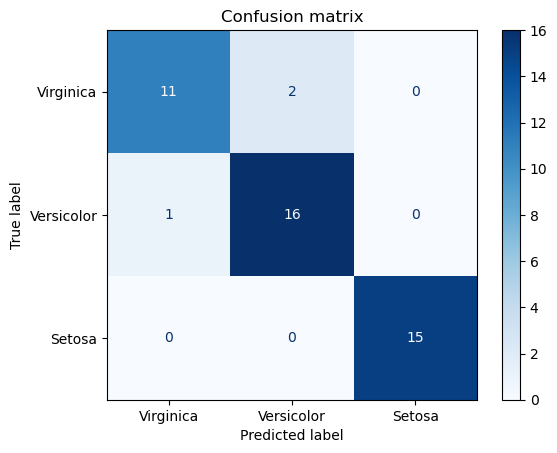

In [31]:
# example confusion matrix
predictionsTestData = bayesianClassifier(trainingData, y_test)
predictionsTestData

position = 0
numberHitsVirginica = 0
numberHitsVersicolor = 0
numberHitsSetosa = 0
virginicaInsteadVersicolor = 0
virginicaInsteadSetosa = 0
versicolorInsteadSetosa = 0
versicolorInsteadVirginica = 0
setosaInsteadVirginica = 0
setosaInsteadVersicolor = 0

for item in predictionsTestData:
    # hits
    if item == X_test[position] == "Iris-virginica":
        numberHitsVirginica += 1
    elif item == X_test[position] == "Iris-versicolor":
        numberHitsVersicolor += 1
    elif item == X_test[position] == "Iris-setosa":
        numberHitsSetosa += 1
    # false decisions
    elif item == "Iris-virginica" and X_test[position] == "Iris-versicolor":
        virginicaInsteadVersicolor += 1
    elif item == "Iris-virginica" and X_test[position] == "Iris-setosa":
        virginicaInsteadSetosa += 1

    elif item == "Iris-versicolor" and X_test[position] == "Iris-virginica":
        versicolorInsteadVirginica += 1
    elif item == "Iris-versicolor" and X_test[position] == "Iris-setosa":
        versicolorInsteadSetosa += 1

    elif item == "Iris-setosa" and X_test[position] == "Iris-virginica":
        setosaInsteadVirginica += 1
    elif item == "Iris-setosa" and X_test[position] == "Iris-versicolor":
        setosaInsteadVersicolor += 1   
    position += 1

# confusion matrix
confusionMatrix = [
    ["Iris-virginica", numberHitsVirginica, round(versicolorInsteadVirginica, 2) , round(setosaInsteadVirginica, 2)],
    ["Iris-versicolor", round(virginicaInsteadVersicolor, 2), round(numberHitsVersicolor, 2), round(setosaInsteadVersicolor, 2)],
    ["Iris-setosa", round(virginicaInsteadSetosa, 2), round(versicolorInsteadSetosa, 2), round(numberHitsSetosa, 2)]
]
head = ["True cluster", "label Iris-virginica", "label Iris-versicolor", "label Iris-setosa"]
tableConfusionMatrix = tabulate(confusionMatrix, headers = head)

print(f"Confusion matrix for Bayes classifier:")
print(tableConfusionMatrix)
print("\n ")

cm = [
        [numberHitsVirginica, versicolorInsteadVirginica, setosaInsteadVirginica],
        [virginicaInsteadVersicolor, numberHitsVersicolor, setosaInsteadVersicolor],
        [virginicaInsteadSetosa, versicolorInsteadSetosa, numberHitsSetosa]
    ]
cm = np.array(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Virginica", "Versicolor", "Setosa"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion matrix")
plt.show()


In [32]:
# split data randomly 30 times, than classify, get average performance

allAccuracies = []
for i in range(30):
     # get random data splits and preprocess 
    y = dataCategorical.loc[:, dataCategorical.columns != 'class']
    X = dataCategorical.loc[:,'class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    trainingData = y_train.join(X_train)
    trainingData = trainingData.reset_index()  
    trainingData = trainingData.drop(labels = "index", axis = "columns")
    testData = y_test.join(X_test)
    testData = testData.reset_index()  
    testData = testData.drop(labels = "index", axis = "columns")
    y_test = testData.loc[:, dataCategorical.columns != 'class']
    X_test = testData.loc[:,'class']

    

    predictionsTestData = bayesianClassifier(trainingData, y_test)

    position = 0
    totalCorrectPredictions = 0
    for item in predictionsTestData:
        if item == X_test[position]:
            totalCorrectPredictions += 1
        position += 1

    accuracy = totalCorrectPredictions/position
    allAccuracies.append(accuracy)

averageAccuracy = sum(allAccuracies)/len(allAccuracies)
print(f"average accuracy of bayesian classifier: {round(averageAccuracy, 2)}")



average accuracy of bayesian classifier: 0.93


2. How does this classifier compare to the k-NN classifier?

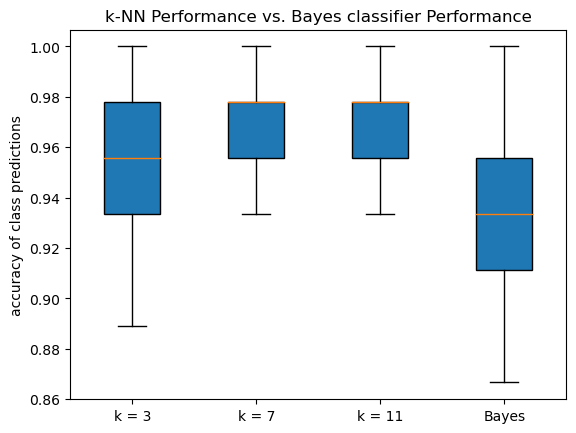

In [33]:
# boxplot visualization

allSingleAccuraciesInList.append(allAccuracies)

# visualize accuracies
labels = ["k = 3", "k = 7", "k = 11", "Bayes"]

fig, ax = plt.subplots()
ax.set_ylabel("accuracy of class predictions")
ax.set_title('k-NN Performance vs. Bayes classifier Performance')
bplot = ax.boxplot(allSingleAccuraciesInList, 
                   labels = labels, 
                   patch_artist=True,
                   whis=1.5)
plt.show()

The Bayes classifier seems to be classifying a bit worse than the k-NN classifiers. We do need to keep in mind though, that by discretizing the dataset, we took some information away, handicapping the bayes classifier a bit.

### Exercise 4

Use the dataset from the previous exercise, with the categorized values (high, medium, low). Use Iris-setosa as your target value (p+ are the examples classified as Iris-setosa and p− the remaining ones) and create 3 new datasets by putting in each the examples that have the same values in the first column, i.e. Low DataSet has all elements that have the value low in the first column, Medium Dataset, has all the examples that have medium value in the dataset and High Dataset has all elements that have high value in the first column.

In [34]:
dictWithNewCategories = {
    'Iris-setosa': "p+", 'Iris-versicolor': "p-", 'Iris-virginica': "p-"
}
dataCategorical = dataCategorical.copy()
dataCategorical["class"] = dataCategorical["class"].map(dictWithNewCategories)
dataCategorical

,sepal length (cat),sepal width (cat),petal length (cat),petal width (cat),class
0,low,high,low,low,p+
1,low,medium,low,low,p+
2,low,medium,low,low,p+
3,low,medium,low,low,p+
4,low,high,low,low,p+
...,...,...,...,...,...
145,high,medium,high,high,p-
146,high,low,high,high,p-
147,high,medium,high,high,p-
148,medium,high,high,high,p-


In [35]:
# 3 subset dfs depending on feature sepal length

lowDataSet = dataCategorical[dataCategorical["sepal length (cat)"] == "low"]
mediumDataSet = dataCategorical[dataCategorical["sepal length (cat)"] == "medium"]
highDataSet = dataCategorical[dataCategorical["sepal length (cat)"] == "high"]

1. Calculate the entropy of the 4 datasets (the complete dataset, and the three subsets).
Calculate the gain of the split of S by feature a.

In [36]:
# calculate entropy

def calculateEntropy(dataSet):
    pPlus = len(dataSet[dataSet["class"] == "p+"])/len(dataSet)
    pMinus = len(dataSet[dataSet["class"] == "p-"])/len(dataSet)
    if pPlus == 0 or pMinus == 0:
        entropy = 0
    else:
        entropy = - (pPlus * np.log2(pPlus) + pMinus * np.log2(pMinus))
    return(entropy)

entropyFullDataSet = calculateEntropy(dataCategorical)
print(f"Entropy full data set: {entropyFullDataSet}")

entropyLowDataSet = calculateEntropy(lowDataSet)
print(f"Entropy low sepal length data set: {entropyLowDataSet}")

entropyMediumDataSet = calculateEntropy(mediumDataSet)
print(f"Entropy medium sepal length data set: {entropyMediumDataSet}")

entropyHighDataSet = calculateEntropy(highDataSet)
print(f"Entropy high sepal length data set: {entropyHighDataSet}")


Entropy full data set: 0.9182958340544896
Entropy low sepal length data set: 0.5699613760403499
Entropy medium sepal length data set: 0.48890859144051524
Entropy high sepal length data set: 0


In [37]:
# calculate info gain
gain = entropyFullDataSet - (sum([len(lowDataSet)*entropyLowDataSet, len(mediumDataSet)*entropyMediumDataSet, len(highDataSet)*entropyHighDataSet])/len(dataCategorical))
gain

0.5675178650424735

2. What is the value of gain(S, a) for the above split? What does it mean in terms of your ability to classify the elements of S before and after the split?

The gain is:


In [38]:
gain

0.5675178650424735

It means that the uncertainty in classifying new examples is reduced by that number.
How good that is depends on the entropy of the original data set and on the comparison of all other possible splits that could be made.

3. Do the same for all features of your dataset. Which is the feature with greatest gain? How can you improve your chances of guessing a random examples’ class using this information?

In [39]:
listWithColoumnNames = [
    'sepal length (cat)', 
    'sepal width (cat)',
    'petal length (cat)', 
    'petal width (cat)']

dictColoumnNameToGain = {}
for coloumnName in listWithColoumnNames:
    lowDataSet = dataCategorical[dataCategorical[coloumnName] == "low"]
    mediumDataSet = dataCategorical[dataCategorical[coloumnName] == "medium"]
    highDataSet = dataCategorical[dataCategorical[coloumnName] == "high"]

    entropyFullDataSet = calculateEntropy(dataCategorical)
    print(f"Entropy full data set: {entropyFullDataSet}")
    entropyLowDataSet = calculateEntropy(lowDataSet)
    print(f"Entropy low data set: {entropyLowDataSet}")
    entropyMediumDataSet = calculateEntropy(mediumDataSet)
    print(f"Entropy medium data set: {entropyMediumDataSet}")
    entropyHighDataSet = calculateEntropy(highDataSet)
    print(f"Entropy high data set: {entropyHighDataSet}")

    gain = entropyFullDataSet - (sum([len(lowDataSet)*entropyLowDataSet, len(mediumDataSet)*entropyMediumDataSet, len(highDataSet)*entropyHighDataSet])/len(dataCategorical))
    print(f" Info gain for {coloumnName}: {gain}")

    dictColoumnNameToGain[coloumnName] = gain

maxGain = max(dictColoumnNameToGain.values()) 
maxGainKeys = [key for key, value in dictColoumnNameToGain.items() if value == maxGain]


maxGainKeys
    

Entropy full data set: 0.9182958340544896
Entropy low data set: 0.5699613760403499
Entropy medium data set: 0.48890859144051524
Entropy high data set: 0
 Info gain for sepal length (cat): 0.5675178650424735
Entropy full data set: 0.9182958340544896
Entropy low data set: 0.2192973081321754
Entropy medium data set: 0.8974271930876951
Entropy high data set: 0.7918583525674836
 Info gain for sepal width (cat): 0.3081172725955511
Entropy full data set: 0.9182958340544896
Entropy low data set: 0
Entropy medium data set: 0
Entropy high data set: 0
 Info gain for petal length (cat): 0.9182958340544896
Entropy full data set: 0.9182958340544896
Entropy low data set: 0
Entropy medium data set: 0
Entropy high data set: 0
 Info gain for petal width (cat): 0.9182958340544896


['petal length (cat)', 'petal width (cat)']

For our discretized data set ['petal length (cat)', 'petal width (cat)']
are the features with the greatest gains. Both perfectly split the data. 
So, if we have a random example, we can just look at the petal length or petal width. If they are "low", classify as "p+". If not, classify as "p-".


4. Explain how to build a decision tree with this information.

In [40]:
subsetPPlus = dataCategorical[dataCategorical["class"] == "p+"]
subsetPPlus.describe()

,sepal length (cat),sepal width (cat),petal length (cat),petal width (cat),class
count,50,50,50,50,50
unique,2,3,1,1,1
top,low,high,low,low,p+
freq,45,32,50,50,50


Buildig a decision tree would be really easy with this datset:

Only rule, with an accuracy of 100%:

    If petal length (cat) == "low":
        categorize as "p+"
    else:
        categorize as "p-"

General procedure when building a decision tree:

    1. calculate entropy and info gain for all possible splits
    2. find highest info gain and use that split criterion for first branching
    
    3. repeat 1. and 2. with subsets of data until all data is classified or no criterions are left
    (if no data left, done :)
    (if no feature left, choose majority category for all data that is left)
